In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
data_df = pd.read_csv("data.csv")

In [4]:
data_df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


## Data Impulation (Missing data replacement)

In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 452.0+ bytes


In [7]:
for col in data_df.columns:
    missing_data = data_df[col].isna().sum() ## trả lại giá trị not a number
    missing_percent = missing_data / len(data_df)*100
    print(f"Column {col} : has {missing_percent}% missing data")


Column Country : has 0.0% missing data
Column Age : has 10.0% missing data
Column Salary : has 10.0% missing data
Column Purchased : has 0.0% missing data


<Axes: >

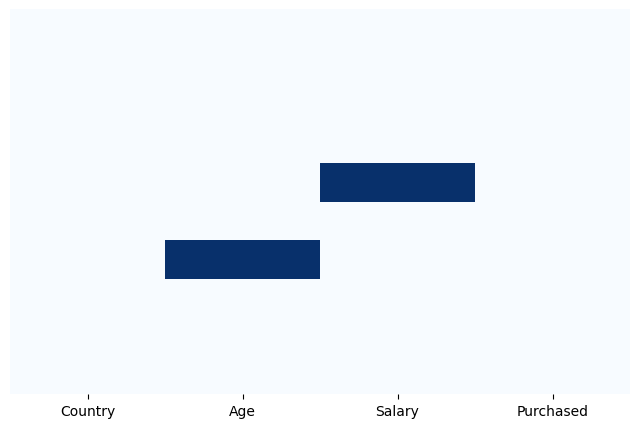

In [8]:
fig, ax =plt.subplots(figsize = (8,5))
sns.heatmap(data_df.isna(), cmap = "Blues", cbar = False, yticklabels = False)

In [9]:
data_df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [10]:
X = data_df.iloc[:,:-1] ## chọn từ đầu đến cột cuối nhưng không lấy cột cuối

In [11]:
X

,Country,Age,Salary
0,France,44.0,72000.0
1,Spain,27.0,48000.0
2,Germany,30.0,54000.0
3,Spain,38.0,61000.0
4,Germany,40.0,NaN
5,France,35.0,58000.0
6,Spain,NaN,52000.0
7,France,48.0,79000.0
8,Germany,50.0,83000.0
9,France,37.0,67000.0


In [12]:
## chuyển x từ data frame thành numpy
X = data_df.iloc[:,:-1].values

In [13]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [14]:
y=data_df.iloc[:,-1].values
## Truy cập một cột cụ thể:
## Cú pháp: df.iloc[:, j] (chọn cột thứ j)
## # Truy cập cột đầu và cột thứ 2
## cols = df.iloc[:, 0:2]
## Truy cập nhiều hàng và nhiều cột:
##Cú pháp: df.iloc[start_row:end_row, start_col:end_col]


In [15]:
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [16]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy = "mean")
imputer.fit(X[:,1:3]) ## lấy từ cột 1 đên cột 2
X[:,1:3] = imputer.transform(X[:,1:3]) 
## có thể thay thế 2 dòng lệnh cuối thành imputer.fit_transform()

In [17]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

## Encode Categorical data

#### Encode independent variable X

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder',OneHotEncoder(), [0])], remainder ='passthrough')
X= ct.fit_transform(X)

In [21]:
X

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

In [23]:
## mã hóa y vì y đang là chuỗi y là depend vaariable 
from sklearn.preprocessing import LabelEncoder

In [27]:
le = LabelEncoder()
y = le.fit_transform(y)

In [29]:
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

### Splitting dataset to training set and test set

In [41]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
X_train1, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    

In [58]:
X_train


array([[1.0, 0.0, 0.0, 35.0, 58000.0],
       [1.0, 0.0, 0.0, 44.0, 72000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0]], dtype=object)

In [45]:
X_test

array([[0.0, 1.0, 0.0, 50.0, 83000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0]], dtype=object)

In [48]:
y_test


array([0, 1])

In [50]:
data_df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [60]:
## cột salary quá cao, chênh lệch lớn với age => feature scaling 

In [62]:
from sklearn.preprocessing import StandardScaler ## chính quy hóa dữ liệu
sc = StandardScaler()
X_train[:,3:]=sc.fit_transform(X_train[:,3:])
X_train

array([[1.0, 0.0, 0.0, -0.7529426005471072, -0.6260377781240918],
       [1.0, 0.0, 0.0, 1.008453807952985, 1.0130429500553495],
       [1.0, 0.0, 0.0, 1.7912966561752484, 1.8325833141450703],
       [0.0, 1.0, 0.0, -1.7314961608249362, -1.0943465576039322],
       [1.0, 0.0, 0.0, -0.3615211764359756, 0.42765697570554906],
       [0.0, 1.0, 0.0, 0.22561095973072184, 0.05040823668012247],
       [0.0, 0.0, 1.0, -0.16581046438040975, -0.27480619351421154],
       [0.0, 0.0, 1.0, -0.013591021670525094, -1.3285009473438525]],
      dtype=object)

In [64]:
X_test

array([[0.0, 1.0, 0.0, 50.0, 83000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0]], dtype=object)

In [70]:
X_test[:,3:]=sc.transform(X_test[:,3:]) ## không fit nữa vì bản X_train đã đucợ fit cùng rồi


In [72]:
X_test

array([[0.0, 1.0, 0.0, -3.260869565217391, -3.7428],
       [0.0, 0.0, 1.0, -3.4347826086956523, -3.742914285714286]],
      dtype=object)